In [27]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

In [28]:
#db params

db_username_0 = 'postgres'
db_password_0 = 'Simulation2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulationdatainit'
table_name_0 = 'simulationsagg4'

In [29]:
#Creating connection and extracting data

connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df_0 = pd.read_sql(query, engine)

In [30]:
df_0.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.152642,596.36,18,111.118684,"[22.708000000000002, 176.794, 188.654, 228.528...","[22.708000000000002, 154.086, 11.8599999999999...",809812,1190188
1,2,0.152642,596.36,11,173.582333,"[104.665, 273.377, 323.64, 627.923, 826.485, 9...","[104.665, 168.712, 50.26299999999998, 304.283,...",956619,1043381
2,3,0.152642,596.36,16,122.044941,"[11.997, 105.0, 236.756, 412.651, 816.535, 876...","[11.997, 93.003, 131.756, 175.895, 403.8839999...",1197437,802563
3,4,0.152642,596.36,15,127.021812,"[178.076, 273.814, 371.882, 379.104, 672.871, ...","[178.076, 95.73800000000003, 98.06799999999998...",1285406,714594
4,5,0.152642,596.36,10,191.182636,"[19.189, 280.36400000000003, 376.455, 757.865,...","[19.189, 261.175, 96.09099999999995, 381.41, 3...",831082,1168918


In [31]:
len(df_0)

10000

In [32]:
unique_combos = df_0.drop_duplicates(subset=['epsilon', 'n_zero_square'])
unique_combos = unique_combos[['epsilon', 'n_zero_square']]
unique_combos

,epsilon,n_zero_square
0,0.152642,596.360000
1336,0.237142,944.933951
2741,0.123943,318.864022
7499,0.101057,226.553750


In [33]:
df_0 = df_0[(df_0['epsilon'] == 0.10105697229623531) & (df_0['n_zero_square'] == 226.55375007277567)]
len(df_0)

2500

In [34]:
df_0.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
7499,7546,0.101057,226.55375,28,76.336000,"[37.674, 96.287, 166.252, 176.981, 273.729, 32...","[37.674, 58.61300000000001, 69.965, 10.7289999...",1073142,926858
7501,7501,0.101057,226.55375,42,46.927791,"[17.135, 56.364000000000004, 70.333, 222.211, ...","[17.135, 39.229, 13.968999999999994, 151.87800...",1021546,978454
7502,7502,0.101057,226.55375,31,63.080781,"[15.331, 33.118, 102.525, 110.348, 138.568, 15...","[15.331, 17.787000000000003, 69.40700000000001...",1020216,979784
7503,7503,0.101057,226.55375,30,71.958742,"[160.42600000000002, 212.275, 251.647, 258.71,...","[160.42600000000002, 51.84899999999999, 39.371...",1322617,677383
7504,7504,0.101057,226.55375,36,59.495676,"[58.984, 145.95600000000002, 208.065, 246.481,...","[58.984, 86.97200000000001, 62.10899999999998,...",1018741,981259


In [35]:
#Defining common filter functions

def any_values_less_than_5(duration_list):
    return any(value < 5 for value in duration_list)

def sum_values_less_than_5(duration_list):
    return sum(value < 5 for value in duration_list)

def update_reversal_durations(df, simulation_end):
    for index, row in df.iterrows():
        full_range = [0] + row['reversal_times'] + [simulation_end]
        durations = [round(full_range[i + 1] - full_range[i], 2) for i in range(len(row['reversal_times']) + 1)]
        df.at[index, 'reversal_durations'] = durations
    return df

def calculate_average_reversal_time_excluding_last(reversal_durations):
    average_reversal_time = np.mean(reversal_durations[:-1])
    return average_reversal_time

def calculate_average_reversal_time(reversal_durations):
    average_reversal_time = np.mean(reversal_durations)
    return average_reversal_time

In [36]:
#Changing df_0 into cleaned_df_0

df_0 = df_0[(df_0['reversal_count'] > 0)]
df_0[((df_0['positive_values'] + df_0['negative_values']) > 2000000)]
df_0 = update_reversal_durations(df_0, 2000)
df_0['average_reversal_time'] = df_0['reversal_durations'].apply(calculate_average_reversal_time)
df_0['average_reversal_time_excluding_last'] = df_0['reversal_durations'].apply(calculate_average_reversal_time_excluding_last)

df_0_AnyLessThan5 = df_0['reversal_durations'].apply(any_values_less_than_5)
df_0['any_less_than_5'] = df_0_AnyLessThan5
df_0[(df_0['any_less_than_5'] == True)].head()
df_0_cleaned = df_0[(df_0['any_less_than_5'] == False)]
df_0_cleaned.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,average_reversal_time_excluding_last,any_less_than_5
7503,7503,0.101057,226.55375,30,64.516129,"[160.42600000000002, 212.275, 251.647, 258.71,...","[160.43, 51.85, 39.37, 7.06, 34.91, 154.15, 83...",1322617,677383,58.976000,False
7505,7505,0.101057,226.55375,29,66.667000,"[37.5, 70.569, 82.693, 134.299, 334.456, 396.8...","[37.5, 33.07, 12.12, 51.61, 200.16, 62.39, 17....",991714,1008286,68.102069,False
7507,7507,0.101057,226.55375,31,62.500312,"[19.123, 50.38, 106.682, 192.233, 299.372, 358...","[19.12, 31.26, 56.3, 85.55, 107.14, 59.19, 158...",1063091,936909,63.236774,False
7508,7508,0.101057,226.55375,32,60.606667,"[34.289, 88.999, 165.02, 216.083, 266.32800000...","[34.29, 54.71, 76.02, 51.06, 50.25, 245.52, 26...",1077611,922389,61.552812,False
7510,7510,0.101057,226.55375,39,50.001000,"[28.335, 60.723, 77.44, 90.932, 177.472, 266.4...","[28.34, 32.39, 16.72, 13.49, 86.54, 88.95, 141...",1022407,977593,50.305897,False


In [37]:
len(df_0_cleaned)

974

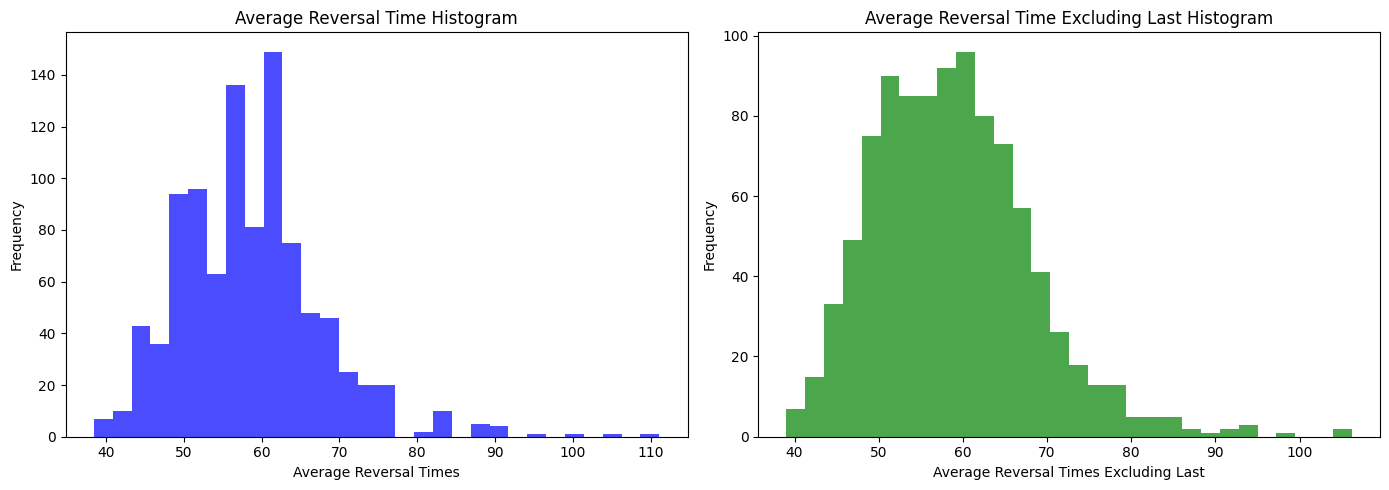

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_0_cleaned['average_reversal_time'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Average Reversal Time Histogram')
axs[0].set_xlabel('Average Reversal Times')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_0_cleaned['average_reversal_time_excluding_last'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Average Reversal Time Excluding Last Histogram')
axs[1].set_xlabel('Average Reversal Times Excluding Last')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

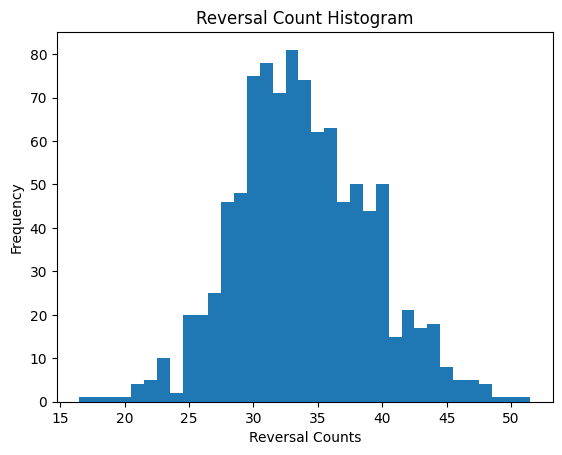

In [39]:
bin_edges = np.arange(start=df_0_cleaned['reversal_count'].min() - .5,
                      stop= df_0_cleaned['reversal_count'].max() + 1.5)
df_0_cleaned['reversal_count'].plot(kind = 'hist', bins = bin_edges, align = 'mid')
plt.title('Reversal Count Histogram')
plt.xlabel('Reversal Counts')
plt.show()